# Topic analysis 
unsupervised learning


Vayansky and Kumar (2020): 
review topic modeling algorithms 
According to their guidelines:
If average number of word per document > 50 and complext topic relationships are NOT of interest ( for ex: evolution of topics over time or correlation between topics), then Latent Dirichlet allocation (LDA) would be a good choice. 



<small>Vayansky, I., & Kumar, S. A. P. (2020) 'A review of topic modeling methods', Information Systems, 94, 101582.</small>


In [12]:
import pandas as pd

file_path = 'data/english_posts_cleaned.csv'
english_posts = pd.read_csv(file_path)
english_posts.info()

# 522377 posts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522377 entries, 0 to 522376
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  522377 non-null  object
 1   main_submission_id  522377 non-null  object
 2   comment_parent_id   522377 non-null  object
 3   subreddit           522377 non-null  object
 4   post_type           522377 non-null  object
 5   text                522377 non-null  object
 6   datetime            522377 non-null  object
 7   month               522377 non-null  int64 
 8   year                522377 non-null  int64 
 9   text_length         522377 non-null  int64 
 10  language            522377 non-null  object
 11  language_ft         522377 non-null  object
dtypes: int64(3), object(9)
memory usage: 47.8+ MB


In [13]:
data = english_posts.copy()
data.head(3)

,id,main_submission_id,comment_parent_id,subreddit,post_type,text,datetime,month,year,text_length,language,language_ft
0,is4ft9s,y2q46p,t3_y2q46p,autism,comment,I don t think it works like that,2022-10-13 05:58:56,10,2022,32,en,en
1,is4gwqj,y2q46p,t3_y2q46p,autism,comment,I do we have handicap add on to our government...,2022-10-13 06:12:48,10,2022,189,en,en
2,is4c22w,y2q46p,t3_y2q46p,autism,comment,Hey u Starflarity thank you for your post at r...,2022-10-13 05:14:14,10,2022,458,en,en


#### LDA - Topic modeling

Based on the Dirichlet distribution = a family of continuous multivariate probability distributions parameterized by a vector Alpha of positive reals. It is a multivariate generalization of the beta distribution,hence its alternative name of multivariate beta distribution (MBD). Dirichlet distributions are commonly used as prior distributions in Bayesian statistics, and in fact, the Dirichlet distribution is the conjugate prior of the categorical distribution and multinomial distribution. (https://en.wikipedia.org/wiki/Dirichlet_distribution)

LDA was initially proposed by Blei et al. (2003) and is based on the following assumpitions:
- documents with similar topics use similar groups of words
- latent topics can then be found by searching for groups of words that frequently occur together in documents across the corpus
- documents are probability distributions over latent topics
- topics themselves are probability distributions over words


expalanation of how it works: https://www.youtube.com/watch?v=be7Xd2Ntai8&ab_channel=AnalyticsExcellence

<small>Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003) 'Latent Dirichlet Allocation', Journal of Machine Learning Research, 3, 993-1022.</small>

How to choose optimal number of topics ( for LDA this needs to be chosen by us ):
- Subject expertise: if you might have an idea of how many topics are present in your documents, choose the number acordingly.
- Perplexity: metric commonly used to evaluate the performance of an LDA model. Lower perplexity values indicate better models. However, it's important to note that perplexity alone might not always reflect the interpretability of topic
- Coherence: measures the interpretability of topic. Higher coherence scores generally indicate better-defined topics. 
- Visual analysis: manually inspect the topics generated the different model. If the topics make sense and are coherent, it's a good indication that the model is good.

In [3]:
%%capture
%pip install import_ipynb

In [14]:
# %%capture

# import import_ipynb
# import reddit_post_analysis

# # Access the variable from the first notebook
# stopwords = reddit_post_analysis.stop_words

# copy pasted as it it faster (the import takes a long time)
stopwords = [
  's',
  'm',
  'go',
  'u',
  're',
  'Ye',
  'OP',
  've',
  'd',
  'll',
  'ok',
  'ex',
  'Oh',
  'im',
  'NT',
  'bc',
  'don t',
  'doesn t',
  'didn t',
  'isn t',
  'aren t',
  'wasn t',
  'wouldn t',
  'won t',
  'don',
  'doesn',
  'didn',
  'isn',
  'aren',
  'wasn',
  'wouldn',
  'won',
  'get',
  "it's",
  "i'd",
  "aren't",
  'otherwise',
  'her',
  'which',
  "you're",
  "they've",
  "doesn't",
  'than',
  'however',
  'my',
  "i've",
  'into',
  "who's",
  'their',
  "she's",
  'an',
  'and',
  'com',
  'any',
  'under',
  "he'd",
  'other',
  'by',
  'k',
  'on',
  'why',
  "when's",
  'am',
  'do',
  "shouldn't",
  "hasn't",
  "shan't",
  'there',
  'we',
  'does',
  'yourselves',
  "she'll",
  "i'll",
  "you'll",
  'each',
  'not',
  "haven't",
  'i',
  'them',
  'so',
  "they'll",
  'can',
  'few',
  'myself',
  'yours',
  'at',
  'could',
  'would',
  'these',
  "he'll",
  "how's",
  'as',
  "can't",
  'being',
  "we'd",
  'once',
  "couldn't",
  'also',
  'both',
  'over',
  "mustn't",
  'how',
  'having',
  'below',
  'all',
  "weren't",
  'out',
  "didn't",
  "hadn't",
  "wasn't",
  "we've",
  "here's",
  'until',
  "isn't",
  'only',
  "you've",
  'they',
  'during',
  'for',
  'very',
  'its',
  'same',
  'just',
  "don't",
  "they're",
  'if',
  'himself',
  "where's",
  'was',
  'it',
  'about',
  'between',
  'no',
  'our',
  'then',
  'did',
  'down',
  'most',
  'ever',
  'have',
  'more',
  "why's",
  'your',
  'she',
  'further',
  'or',
  'should',
  "we'll",
  'what',
  'while',
  'doing',
  "that's",
  'else',
  "there's",
  'yourself',
  'to',
  'such',
  'hers',
  'nor',
  'ours',
  'you',
  "wouldn't",
  'he',
  'a',
  'again',
  'of',
  "we're",
  'through',
  'before',
  'from',
  'like',
  "let's",
  'own',
  'herself',
  'shall',
  'against',
  'because',
  'after',
  'http',
  'with',
  'r',
  'this',
  'the',
  'were',
  'that',
  'above',
  "he's",
  'be',
  "won't",
  'those',
  "i'm",
  'some',
  'hence',
  'who',
  'too',
  'his',
  'up',
  'is',
  'whom',
  'him',
  'are',
  'where',
  'cannot',
  'ought',
  'ourselves',
  'therefore',
  'since',
  'in',
  'here',
  'been',
  'itself',
  'theirs',
  'me',
  'has',
  "she'd",
  "they'd",
  "you'd",
  'off',
  'had',
  "what's",
  'www',
  'when',
  'themselves',
  'but',
  't'
]

In [15]:
stopwords

['s',
 'm',
 'go',
 'u',
 're',
 'Ye',
 'OP',
 've',
 'd',
 'll',
 'ok',
 'ex',
 'Oh',
 'im',
 'NT',
 'bc',
 'don t',
 'doesn t',
 'didn t',
 'isn t',
 'aren t',
 'wasn t',
 'wouldn t',
 'won t',
 'don',
 'doesn',
 'didn',
 'isn',
 'aren',
 'wasn',
 'wouldn',
 'won',
 'get',
 "it's",
 "i'd",
 "aren't",
 'otherwise',
 'her',
 'which',
 "you're",
 "they've",
 "doesn't",
 'than',
 'however',
 'my',
 "i've",
 'into',
 "who's",
 'their',
 "she's",
 'an',
 'and',
 'com',
 'any',
 'under',
 "he'd",
 'other',
 'by',
 'k',
 'on',
 'why',
 "when's",
 'am',
 'do',
 "shouldn't",
 "hasn't",
 "shan't",
 'there',
 'we',
 'does',
 'yourselves',
 "she'll",
 "i'll",
 "you'll",
 'each',
 'not',
 "haven't",
 'i',
 'them',
 'so',
 "they'll",
 'can',
 'few',
 'myself',
 'yours',
 'at',
 'could',
 'would',
 'these',
 "he'll",
 "how's",
 'as',
 "can't",
 'being',
 "we'd",
 'once',
 "couldn't",
 'also',
 'both',
 'over',
 "mustn't",
 'how',
 'having',
 'below',
 'all',
 "weren't",
 'out',
 "didn't",
 "hadn't",

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Get the default English stop words from CountVectorizer
default_stopwords = CountVectorizer(stop_words='english').get_stop_words()

all_stopwords = list(default_stopwords)
# Combine the default and custom stop words
for i in stopwords:
    if i not in all_stopwords:
        all_stopwords.append(i)

# all_stopwords


In [7]:
# %%capture
# %pip install pyldavis

In [17]:
import numpy as np
import pandas as pd
import spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
nlp = spacy.load('en_core_web_sm')
%matplotlib inline

In [9]:
# Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens. 
# Tokens can be individual words, phrases or even whole sentences. In the process of tokenization, some characters like punctuation marks are discarded. 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence))) 
data_words = list(sent_to_words(data.text))

# append 'words' column to dataset
data.loc[:, 'words'] = data_words
print(data_words[:2])

[['don', 'think', 'it', 'works', 'like', 'that'], ['do', 'we', 'have', 'handicap', 'add', 'on', 'to', 'our', 'governments', 'student', 'money', 'but', 'if', 'you', 'have', 'it', 'you', 'can', 'only', 'earn', 'an', 'amount', 'of', 'money', 'on', 'the', 'side', 'and', 'you', 'only', 'get', 'it', 'as', 'long', 'as', 'you', 're', 'student', 'obviously']]


In [10]:
# Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.
# The advantage of this is, we get to reduce the total number of unique words in the dictionary. 
# As a result, the number of columns in the document-word matrix (created by CountVectorizer in the next step) will be denser with lesser columns. 
# You can expect better topics to be generated in the end.
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): 
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out


In [11]:
# Initialize spacy ‘en’ model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# Do lemmatization keeping only Noun and Verb - these are the parts of speech that usually reflect topics
data_lemmatized = lemmatization(data.words, allowed_postags=['NOUN', 'VERB']) 
data.loc[:, 'lemmas'] = data_lemmatized
print(data_lemmatized[:2])

# After this pre-processing, the post text is represented as a collection of words (= bag of words).

['think work', 'add government student money earn amount money side get student']


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522377 entries, 0 to 522376
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  522377 non-null  object
 1   main_submission_id  522377 non-null  object
 2   comment_parent_id   522377 non-null  object
 3   subreddit           522377 non-null  object
 4   post_type           522377 non-null  object
 5   text                522377 non-null  object
 6   datetime            522377 non-null  object
 7   month               522377 non-null  int64 
 8   year                522377 non-null  int64 
 9   text_length         522377 non-null  int64 
 10  language            522377 non-null  object
 11  language_ft         522377 non-null  object
 12  words               522377 non-null  object
 13  lemmas              522377 non-null  object
dtypes: int64(3), object(11)
memory usage: 55.8+ MB


In [13]:
data.head(2)

,id,main_submission_id,comment_parent_id,subreddit,post_type,text,datetime,month,year,text_length,language,language_ft,words,lemmas
0,is4ft9s,y2q46p,t3_y2q46p,autism,comment,I don t think it works like that,2022-10-13 05:58:56,10,2022,32,en,en,"[don, think, it, works, like, that]",think work
1,is4gwqj,y2q46p,t3_y2q46p,autism,comment,I do we have handicap add on to our government...,2022-10-13 06:12:48,10,2022,189,en,en,"[do, we, have, handicap, add, on, to, our, gov...",add government student money earn amount money...


In [14]:
cv = CountVectorizer(analyzer='word',
                     max_df=0.9,                        # maimum required occurences of a word 
                     min_df=2,                          # minimum required occurences of a word 
                     stop_words=all_stopwords,          # remove stop words
                     lowercase=True,                    # convert all words to lowercase
                     token_pattern='[a-zA-Z0-9]{3,}',   # num chars > 3
                     max_features=50000,                # max number of uniq words
                    )
            

In [15]:
# no need to do train/validate/test split as it is unsupervised learning
# vectorize all text dataset
data_vectorized = cv.fit_transform(data.lemmas)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['couldn', 'hadn', 'hasn', 'haven', 'let', 'mustn', 'shan', 'shouldn', 'weren'] not in stop_words.
  warnings.warn(


In [16]:
# 522377 text rows
# each text/document row is represented by a 37574 dimentions vector (dataset has 37574 features)
data_vectorized

<522377x37574 sparse matrix of type '<class 'numpy.int64'>'
	with 7156031 stored elements in Compressed Sparse Row format>

In [19]:
# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
# learning_decayfloat, default=0.7
# learning_method{‘batch’, ‘online’}, default=’batch’
from sklearn.decomposition import LatentDirichletAllocation
max_iter = 10

LDA = LatentDirichletAllocation(n_components=10,            # number of topics
                                max_iter=max_iter,          # 
                                batch_size=512,             # number docs in each learning iteration (as there are 10 iter, max 5120 of the docs will be seen when building the model)
                                random_state=7,
                                learning_method='online',
                                evaluate_every = -1,        # compute perplexity every n iters, default: Don't
                                )

In [20]:
LDA.fit(data_vectorized)
print(LDA)  # Model attributes

LatentDirichletAllocation(batch_size=512, learning_method='online',
                          random_state=7)


In [21]:
# evaluate model performance

# Log Likelyhood: Higher the better
print("Log Likelihood: ", LDA.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
# perplexity might not be the best measure to evaluate topic models because it doesn’t consider the context and semantic associations between words.
print("Perplexity: ", LDA.perplexity(data_vectorized))

# See model parameters
pprint(LDA.get_params())


Log Likelihood:  -64566479.61332703
Perplexity:  1656.5376129746833
{'batch_size': 512,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': 7,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [22]:
# get the vocab of the words
vocab_size = len(cv.get_feature_names_out())
print('Number of words in vocab.: ', vocab_size)

Number of words in vocab.:  37574


In [53]:
# get the most common words per topic = words that have the highes probabilities of belonging to a topic
# argsort() gets index positions sorted from least to greatest
# top 10 = last 10 vlaues of argsort()
# code reference documentation:
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

import matplotlib.pyplot as plt
import numpy as np

def plot_top_words(model, feature_names, n_top_words, title, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(30, 32), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]  # 

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

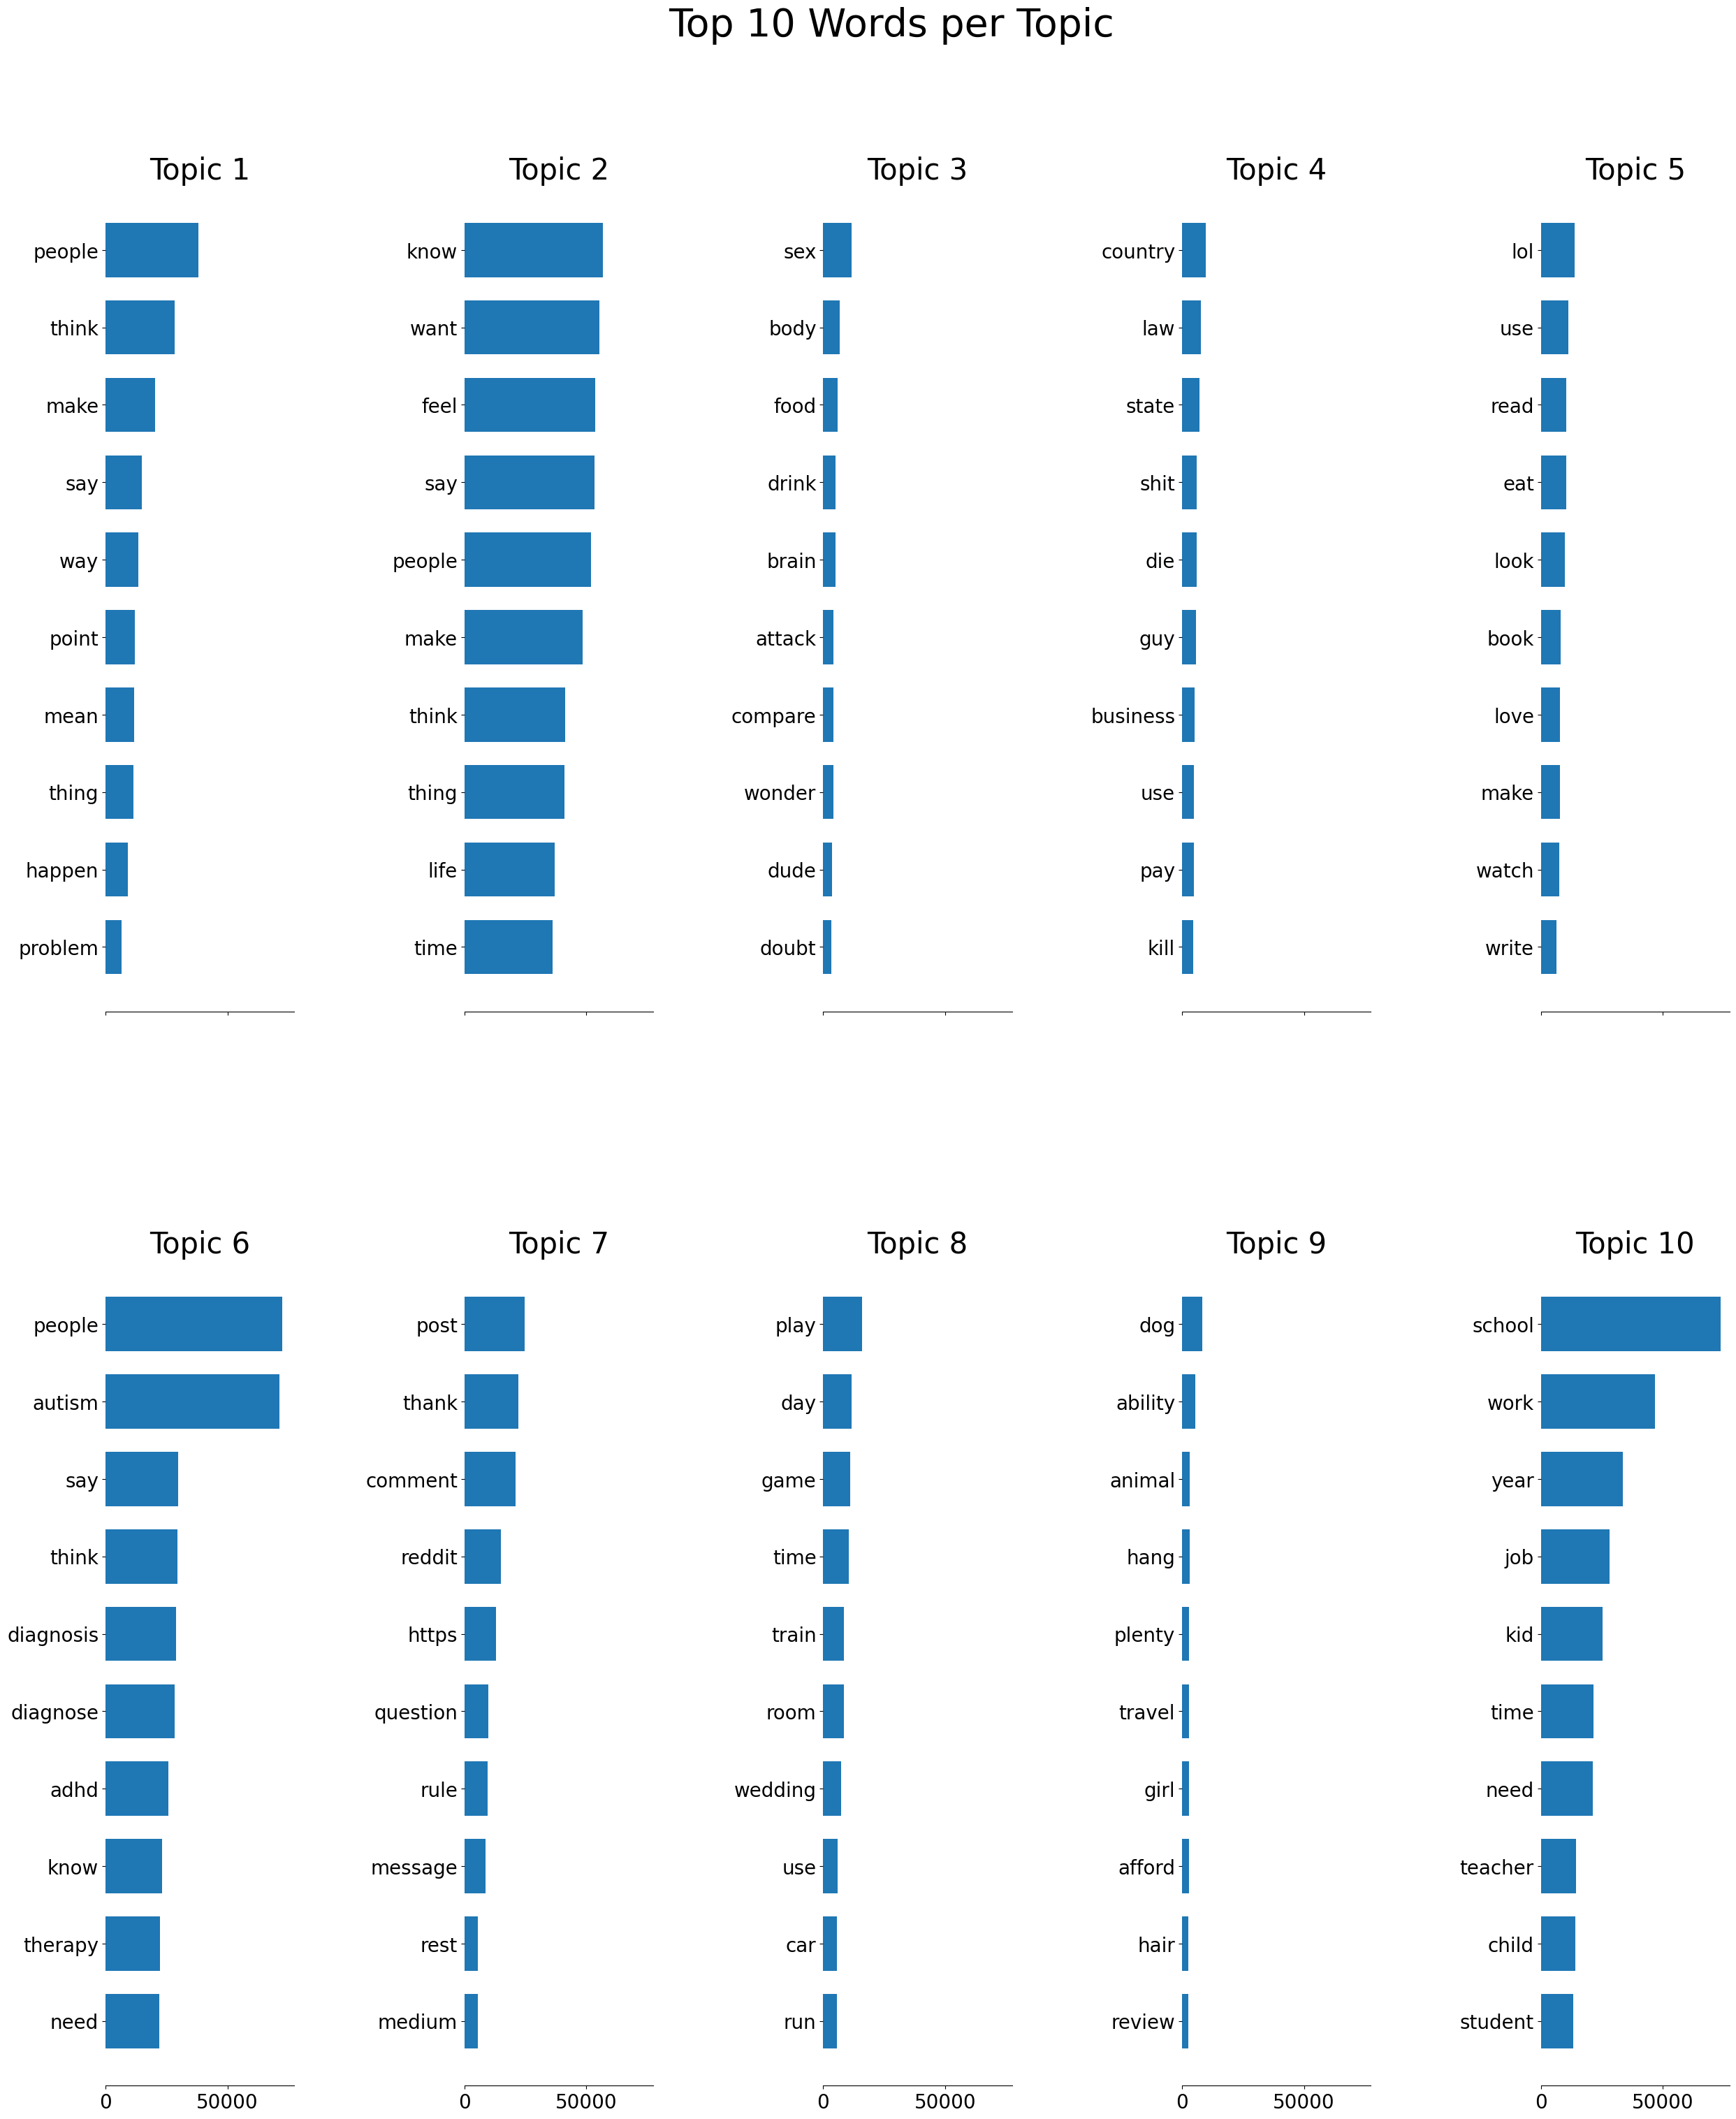

In [24]:
# get the topics
topics = LDA.components_

# plot the top 10 words per topic
feature_names = np.array(cv.get_feature_names_out())
title = 'Top 10 Words per Topic'
plot_top_words(LDA, feature_names, 10, title, 2, 5)

In [26]:
# Use GridSearch to determine the best LDA model.
# The most important tuning parameter for LDA models is n_components (number of topics).
# This is the only parameter optimised for as adding other paramers is computationally too intesive for my computer's capabilities

# Define Search Param
search_params = {'n_components': [10, 15, 20]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=10,    
                                batch_size=512,  
                                random_state=7,
                                learning_method='online',
                                evaluate_every = -1,    # compute perplexity every n iters, default: Don't
                              )
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params, cv=5, error_score='raise', refit=True)
# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(error_score='raise',
             estimator=LatentDirichletAllocation(batch_size=512,
                                                 learning_method='online',
                                                 random_state=7),
             n_jobs=-1, param_grid={'n_components': [10, 15, 20]})

In [27]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'n_components': 10}
Best Log Likelihood Score:  -13248068.130115971
Model Perplexity:  1656.5376129746833


The best topic GridSearch found was the initial model we build - setting topics to 10. However at the topics (see graphs above) are not very clear , and none seem to be about ABA. Topic 6 seems to be about ASD diagnostic and therapy in general but not specifically about ABA.

#### Non-negative Matrix Factorization (NMF; Lee and  Seung, 1999)
= dimentionality reduction algorithm that simultanously performs dimentionality reduction and clustering. We can use it in conjunction with TF-IDF(define it) to model topics in text documents.

Math behind it: given a non negative matrix A, find the k-dimentions aproximation in terms of non-negative factors W  and H . (A = W • H) - the k dimensions needs to be set by the human. 

1. contruct a vector space model for documents  => term document matrix A
2. apply TF-IDF term weight normalization to A
3. normalize TF-IDF vectors to unit length
4. initialize factors using NNDSVD (Nonnegative Double Singular Value Decomposition https://nimfa.biolab.si/nimfa.methods.seeding.nndsvd.html; Boutsidis and Gallopoulos, 2007) on A
5. apply projected gradient NMF to A

(this is done under the hood with sklearn)



<small>Boutsidis, C., Gallopoulos, E., 2008. SVD-based initialization: A head start for nonnegative matrix factorization. Pattern Recognition, 41(4): 1350-1362. 

Lee, D.D., Seung, H.S., 1999. Learning the parts of objects by non-negative matrix factorization. Nature 401, 788–791. https://doi.org/10.1038/44565
</small>



In [20]:
data.head(3)

,id,main_submission_id,comment_parent_id,subreddit,post_type,text,datetime,month,year,text_length,language,language_ft
0,is4ft9s,y2q46p,t3_y2q46p,autism,comment,I don t think it works like that,2022-10-13 05:58:56,10,2022,32,en,en
1,is4gwqj,y2q46p,t3_y2q46p,autism,comment,I do we have handicap add on to our government...,2022-10-13 06:12:48,10,2022,189,en,en
2,is4c22w,y2q46p,t3_y2q46p,autism,comment,Hey u Starflarity thank you for your post at r...,2022-10-13 05:14:14,10,2022,458,en,en


In [21]:
# NMF works with coeficients, not word probabilities like LDA
# we can use TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.9, min_df=2, stop_words=stopwords)

In [22]:
# document term matrix
dtm = tfidf.fit_transform(data.text)
dtm

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['couldn', 'hadn', 'hasn', 'haven', 'let', 'mustn', 'nt', 'oh', 'op', 'shan', 'shouldn', 'weren', 'ye'] not in stop_words.
  warnings.warn(


<522377x71184 sparse matrix of type '<class 'numpy.float64'>'
	with 12160756 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.decomposition import NMF
# default=’frobenius’ (Beta divergence to be minimized, measuring the distance between X and the dot product WH)
# this is used as it is the fastes version of NMF ( computational limitations )

nmf_model = NMF(n_components=10, random_state=7)

In [24]:
# nmf works much faster than LDA
nmf_model.fit(dtm)

NMF(n_components=10, random_state=7)

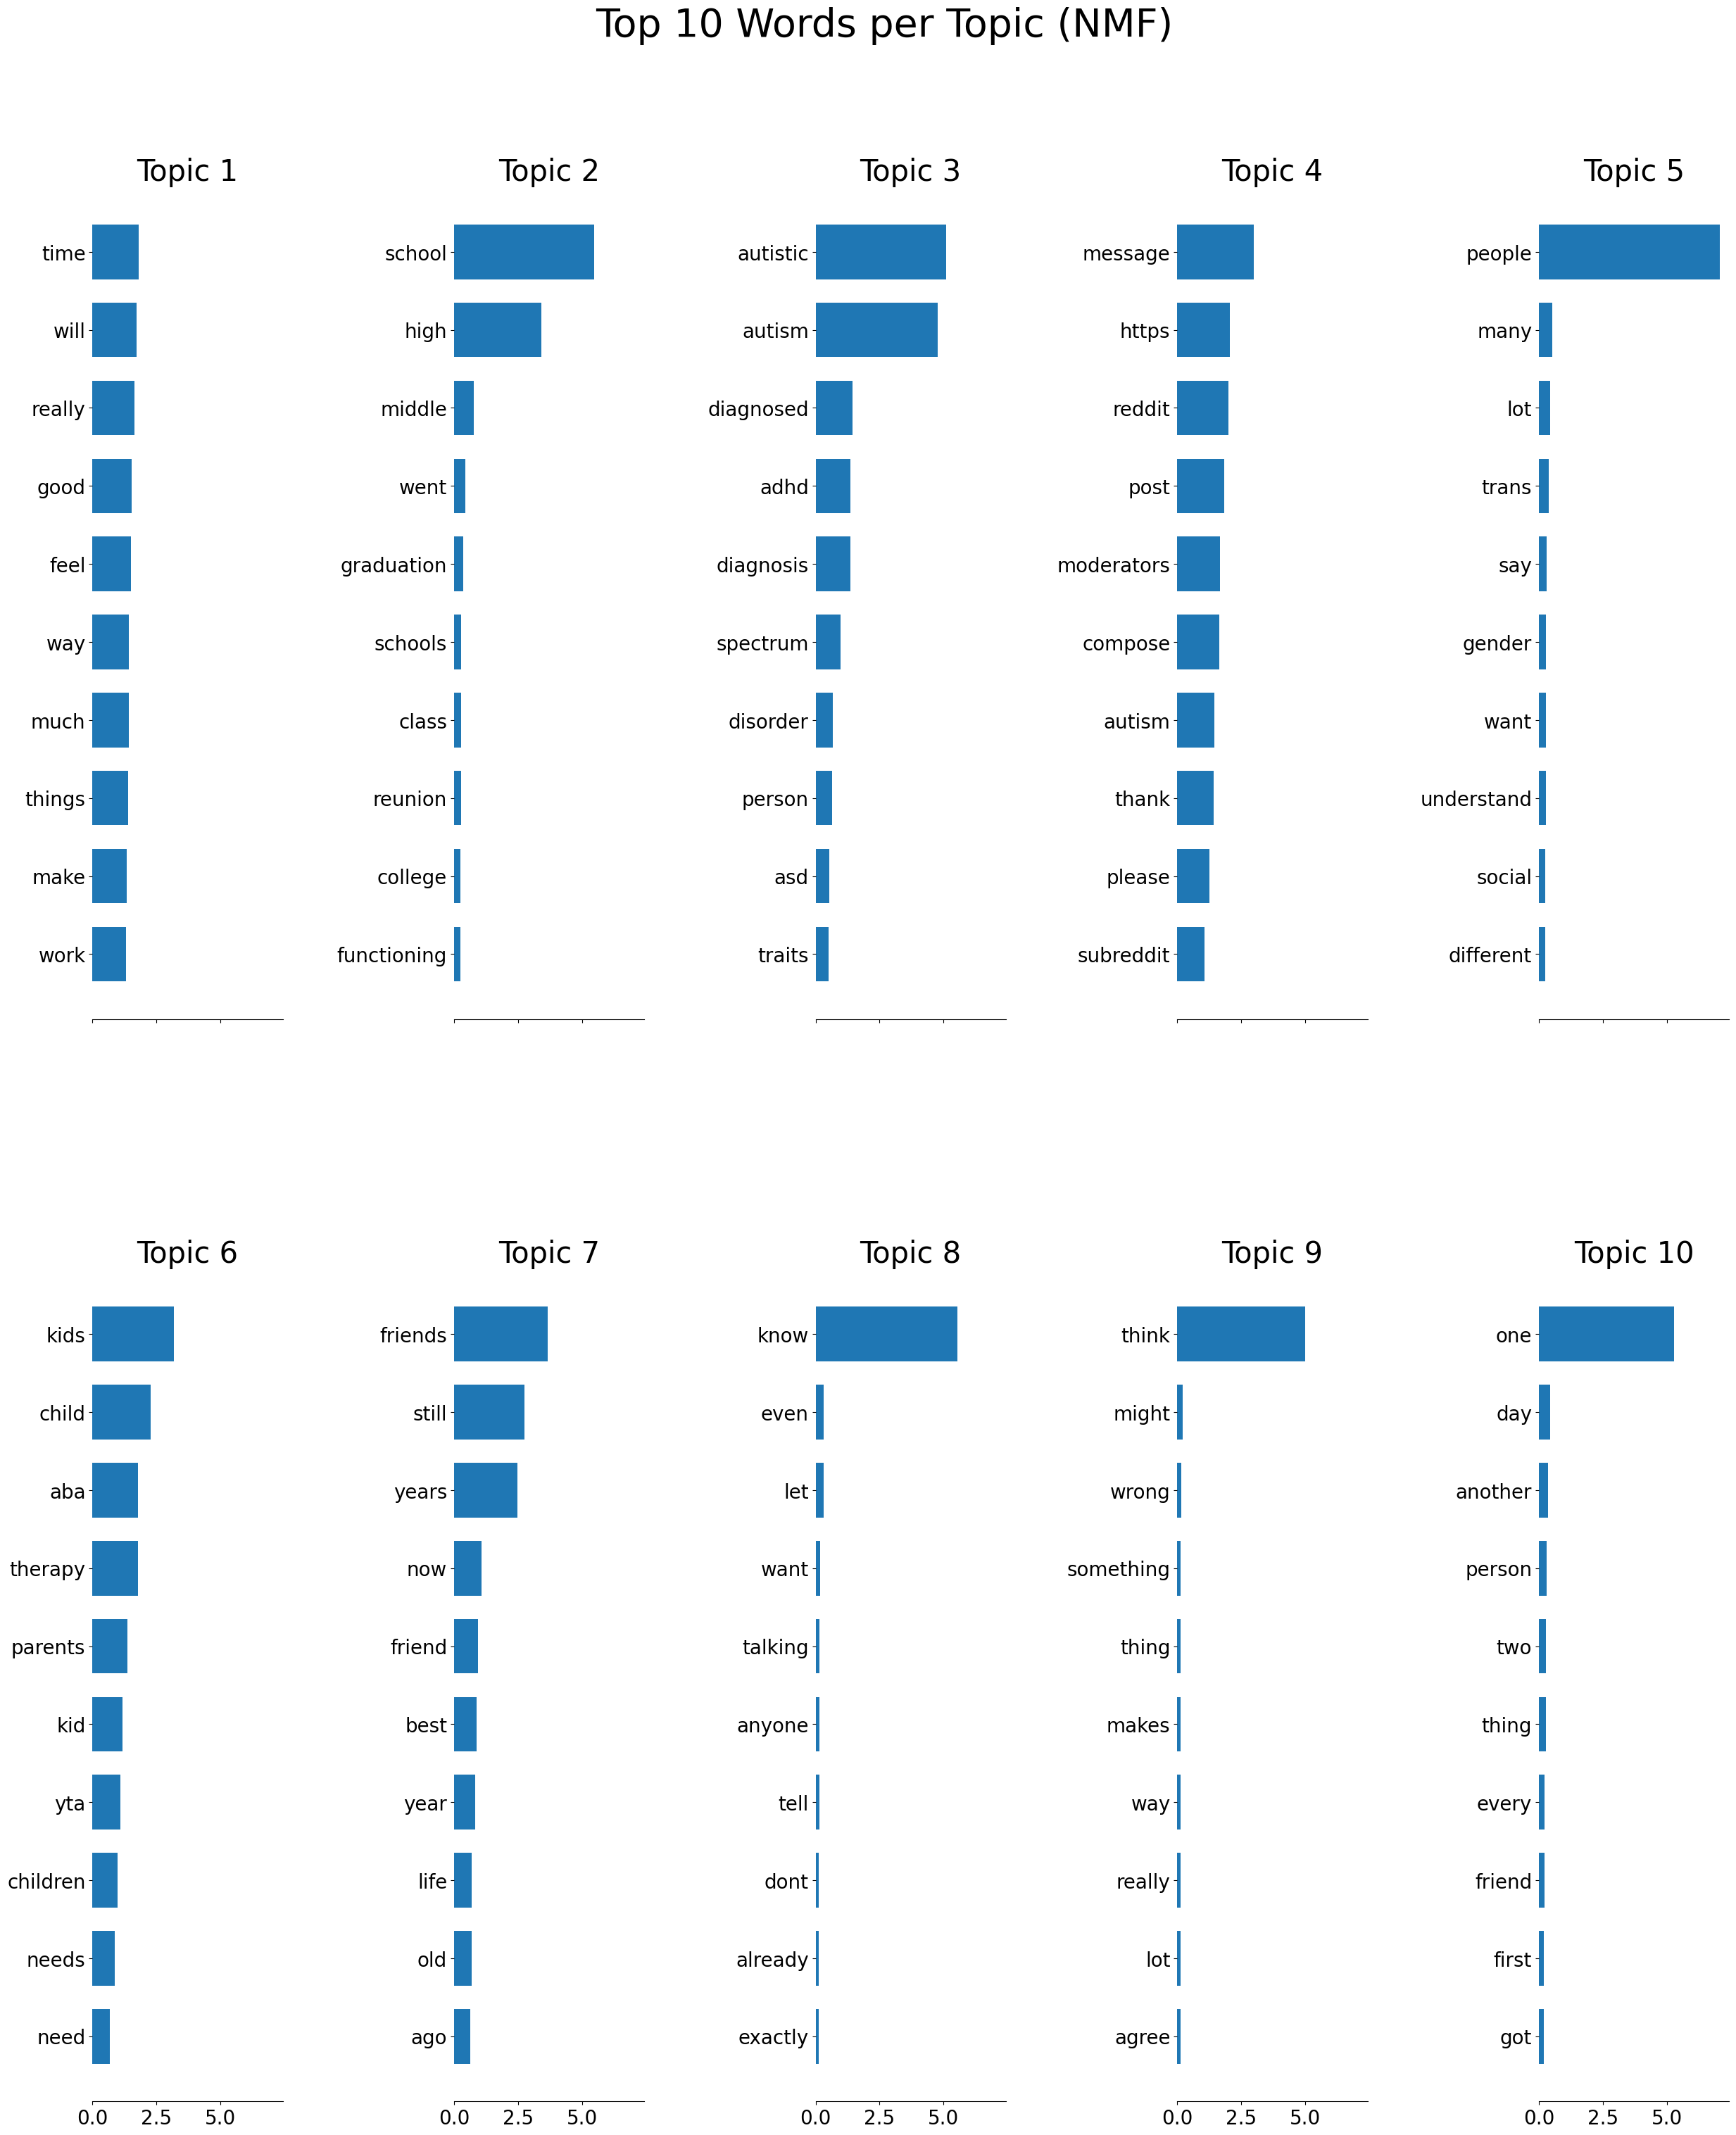

In [54]:
# get top 10 words per topic
# words that have the highest coeficients in the W matrix

# get the topics
topics = nmf_model.components_

# plot the top 10 words per topic
feature_names = np.array(tfidf.get_feature_names_out())
title = 'Top 10 Words per Topic (NMF)'
plot_top_words(nmf_model, feature_names, 10, title, 2, 5)

# the topics resulted from NMF seem to make more sense
# topic 3 seems relatedt to ASD and specifically to diagnostic
# topic 6 seems to be related to ABA and therapy in children (it appears that aba is seen as a threapy for children on Reddit)

In [41]:
# evaluate the model 
# for NMF, we can evaluate the quality of the model using reconstruction error or by examining the topics generated
# reconstruction error = how well the original data can be reconstructed from the factorization. Lower values indicate a better fit.
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
# reconstruction_error = Frobenius norm of the matrix difference, or beta-divergence, between the training data X and the reconstructed data WH from the fitted model.
reconstruction_error = nmf_model.reconstruction_err_
print(f"Reconstruction Error: {reconstruction_error}")

Reconstruction Error: 711.4097847157852


In [48]:
# Function to calculate reconstruction error
def reconstruction_error(model, X):
    print(f'topics: {len(model.components_)} \nReconstruction Error: {model.reconstruction_err_}')
    # the GridSearch aims to maximise the scoring metric 
    # we need to negate the reconstruction error if we want GridSearch to return the minimal value 
    return -model.reconstruction_err_

In [49]:
# use GridSearch to find the NMF model with the lowest reconstruction error ( optimise for the number of topics )
from sklearn.model_selection import GridSearchCV

np.random.seed(7)

# Define the parameter grid
param_grid = {'n_components': [10, 15, 20]}
nmf = NMF(random_state=7)
grid_search = GridSearchCV(nmf, param_grid=param_grid, scoring=reconstruction_error, cv=5, refit=True)
grid_search.fit(dtm)

# Get the best model from the grid search
best_nmf_model = grid_search.best_estimator_

topics: 10 
Reconstruction Error: 636.0927139790991
topics: 10 
Reconstruction Error: 636.0200392078059
topics: 10 
Reconstruction Error: 636.1022379407136
topics: 10 
Reconstruction Error: 636.4287860885437
topics: 10 
Reconstruction Error: 636.1420603474128
topics: 15 
Reconstruction Error: 633.5418388781883
topics: 15 
Reconstruction Error: 633.544423514803
topics: 15 
Reconstruction Error: 633.5830092822969


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


topics: 15 
Reconstruction Error: 633.9521217833715
topics: 15 
Reconstruction Error: 633.645487647181


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


topics: 20 
Reconstruction Error: 631.183498697986
topics: 20 
Reconstruction Error: 631.214127187099
topics: 20 
Reconstruction Error: 631.2995634435456
topics: 20 
Reconstruction Error: 631.7142683360461
topics: 20 
Reconstruction Error: 631.4356626829825


In [52]:
best_nmf_model

NMF(n_components=20, random_state=7)

In [51]:
# Print the best parameters and corresponding reconstruction error
print("Best Parameters:", grid_search.best_params_)
print("Best Reconstruction Error:", -grid_search.best_score_)

Best Parameters: {'n_components': 20}
Best Reconstruction Error: 631.3694240695319


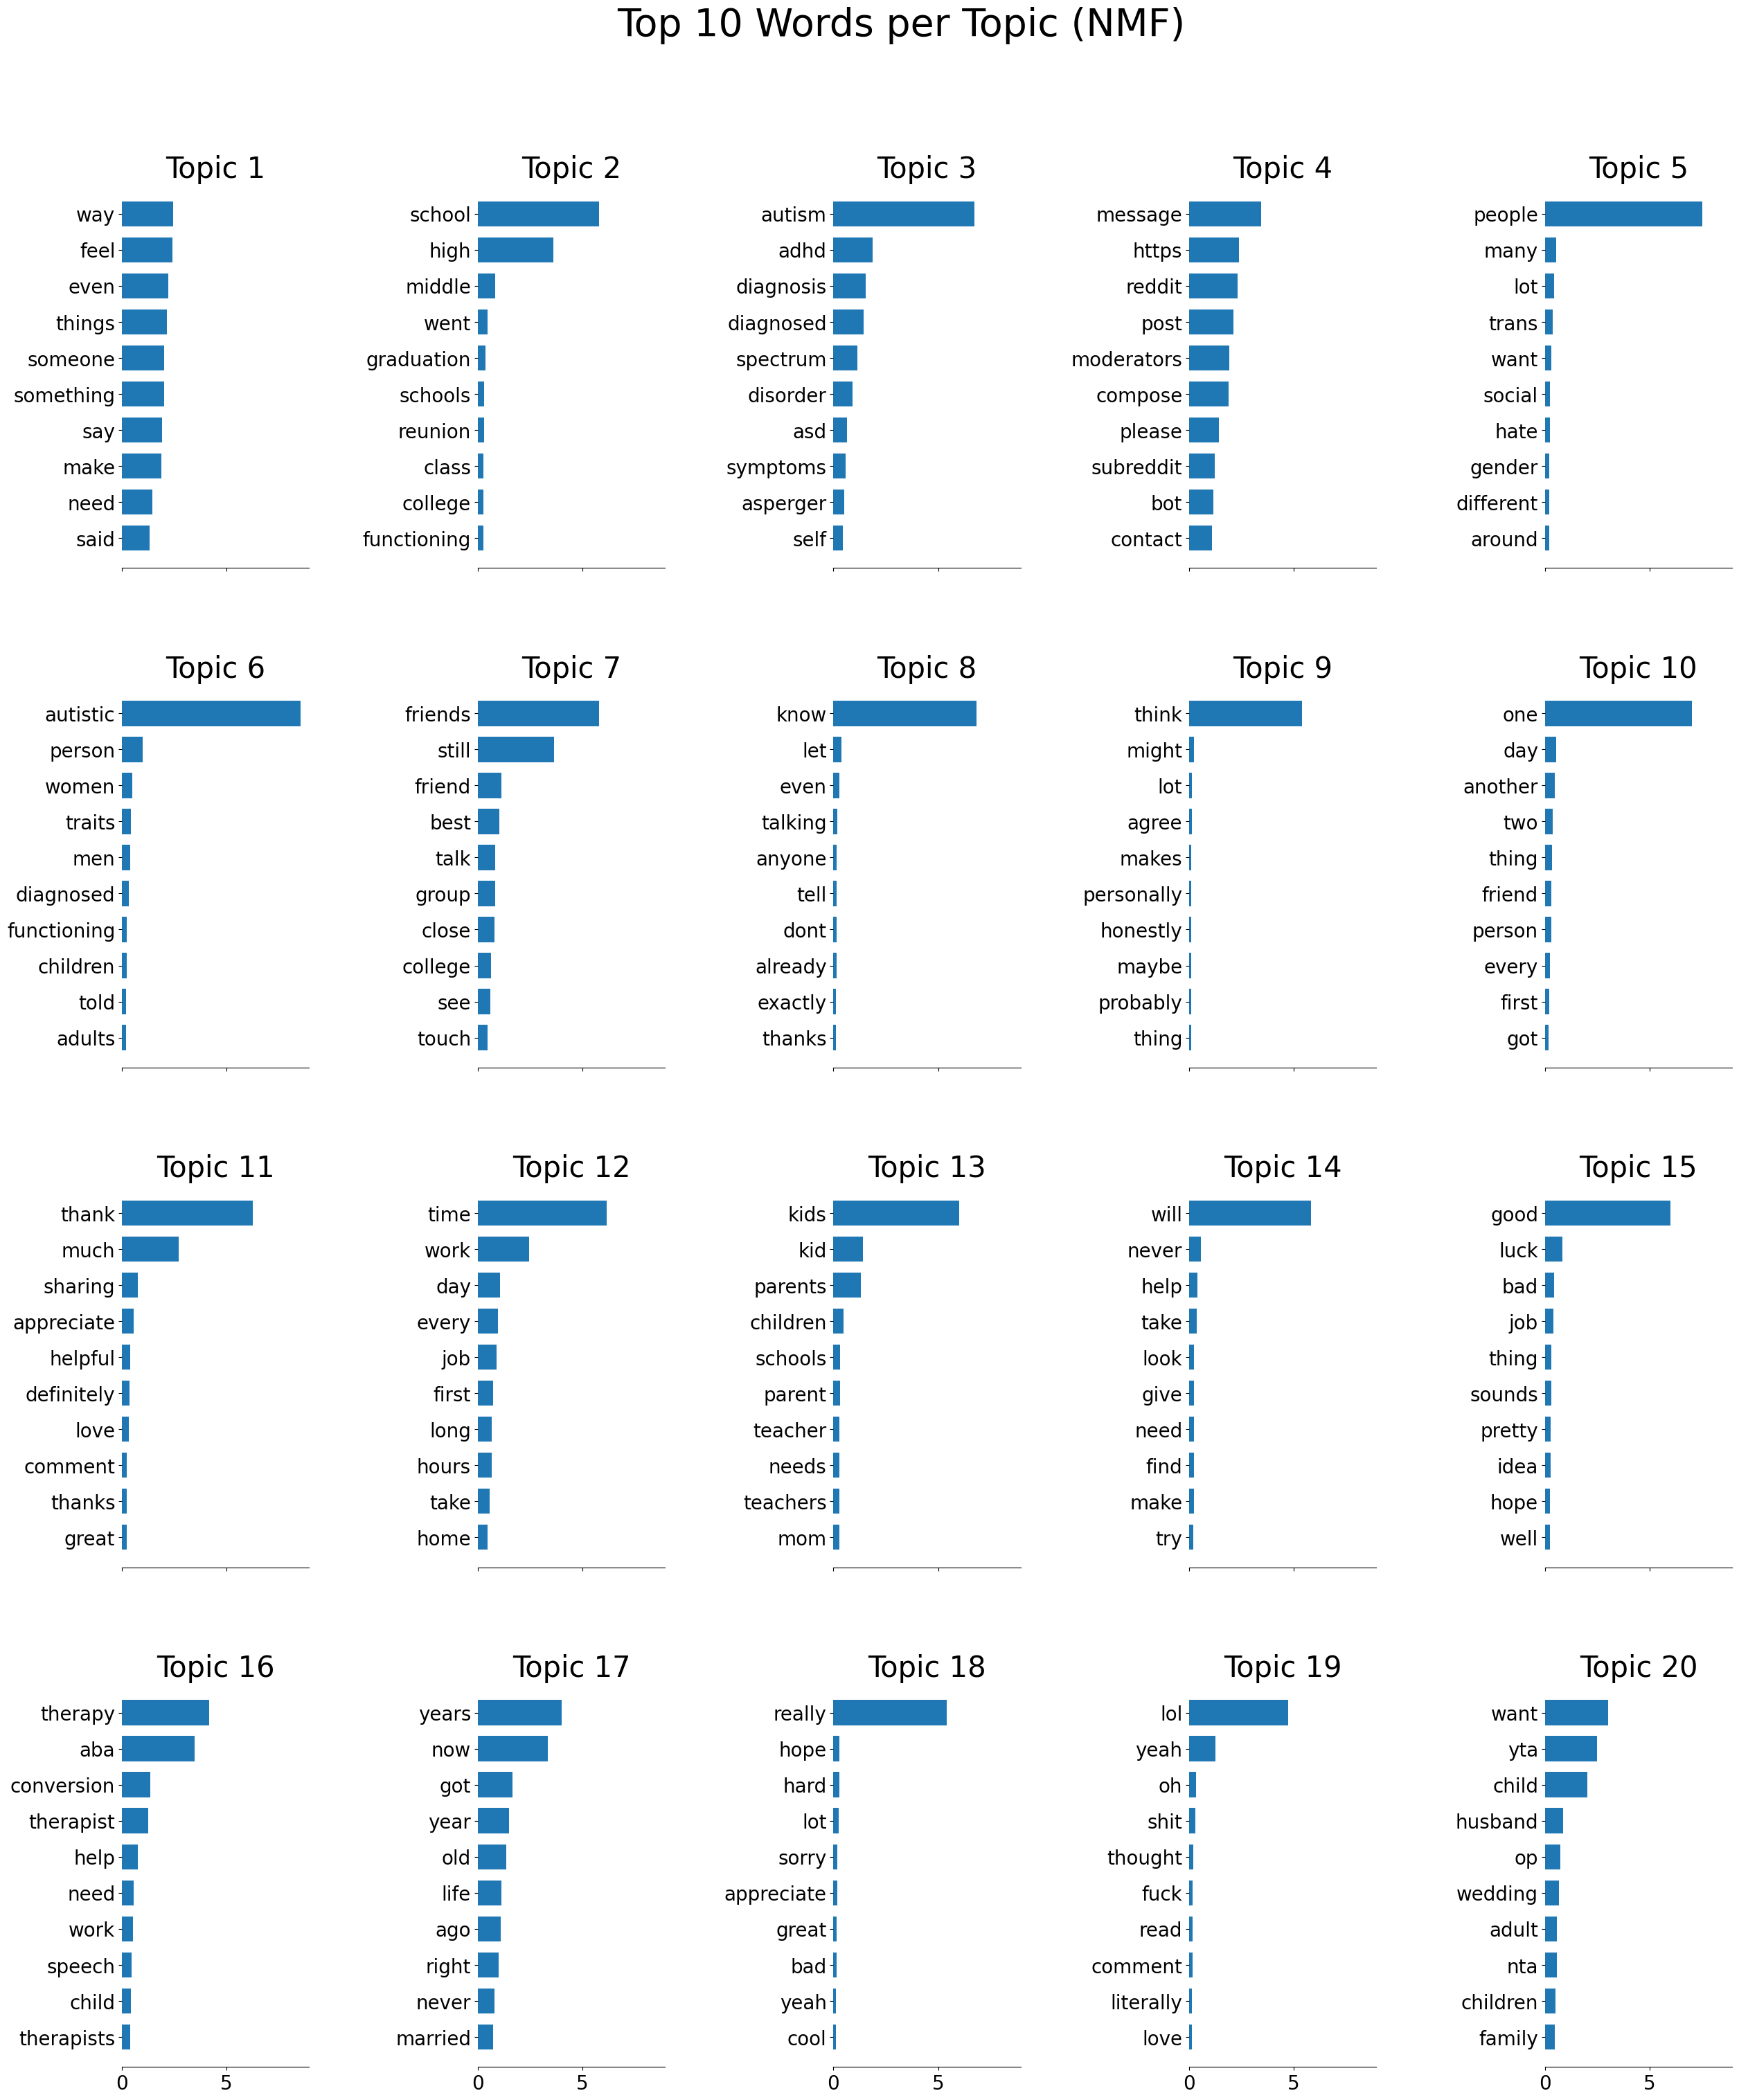

In [57]:
# get top 10 words per topic
# words that have the highest coeficients in the W matrix

# get the topics
topics = best_nmf_model.components_

# plot the top 10 words per topic
feature_names = np.array(tfidf.get_feature_names_out())
title = 'Top 10 Words per Topic (NMF)'
plot_top_words(best_nmf_model, feature_names, 10, title, 4, 5)

# the topics are diverse, most seem to show a clear pattter:
# Topic 3 seems to be about autism diagnostics 
# topic 6 seems to be about autism in general (adults and children with autism)
# topic 16 seems to be about therapy and aba 

In [28]:
# %%capture
# %pip install -U pip setuptools wheel
# %pip install -U 'spacy[apple]'
# !python3 -m spacy download en_core_web_sm
# !python3 -m spacy validate


In [29]:
# %%capture
# %pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

#### Deep learning pipeline

pre-process text --> vectorize (dense embedings) --> deep learning Neural Net (hidden layers) --> output (here: topics)

In the DL pipeline, the raw data (after pre-processing) is directly fed to a model. The model is capable of “learning” features from the data. Hence, these features are more in line with the task at hand, so they generally give improved performance. But, since all these features are learned via model parameters, the model loses interpretability. (Vajjala et al., 2020)

<small>Vajjala, S., Majumder, B., Gupta, A., & Surana, H. (2020). Practical Natural Language Processing. O'Reilly Media, Inc.</small>

#### BERTopic
'BERTopic generates document embedding with pre-trained transformer-based language models, clusters these embeddings, and finally, generates topic representations with the class-based TF-IDF procedure. BERTopic generates coherent topics and remains competitive across a variety of benchmarks involving classical models and those that follow the more recent clustering approach of topic modeling.' (Grootendorst, 2022)

<small>Grootendorst, M. (2022). "BERTopic: Neural topic modeling with a class-based TF-IDF procedure." arXiv:2203.05794v1 [cs.CL]. </small>


In [30]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
# import torch
# from transformers import DistilBertTokenizer, DistilBertModel
# from pytorch_pretrained_bert import BertTokenizer, BertModel